In [5]:
#imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import mean_squared_error , r2_score , mean_absolute_error

In [8]:
#reading dataset & dropping null values from main columns that can affect the training process
# there are other null values in other columns found after searching in the CSV file
df = pd.read_csv("StudentPerformanceFactors.csv")
df = df.dropna(axis=0)

In [10]:
#train/split
X = df[["Hours_Studied"]]
y = df['Exam_Score']

In [12]:
X.describe() #getting stat summary for x and y below

,Hours_Studied
count,6378.000000
mean,19.977109
std,5.985460
min,1.000000
25%,16.000000
50%,20.000000
75%,24.000000
max,44.000000


In [13]:
X.head() #displaying first 5 values

,Hours_Studied
0,23
1,19
2,24
3,29
4,19


In [15]:
y.describe()

,Exam_Score
count,6378.000000
mean,67.252117
std,3.914217
min,55.000000
25%,65.000000
50%,67.000000
75%,69.000000
max,101.000000


In [16]:
y.head()

,Exam_Score
0,67
1,61
2,74
3,71
4,70


In [18]:
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.2, random_state=42) #keeping 20% to test after training the other 80%

In [21]:
model = LinearRegression() #creating a linear reg model to fit x train and y train on it
model.fit(X_train, y_train)

LinearRegression()

In [23]:
y_pred=model.predict(X_test) #predicting

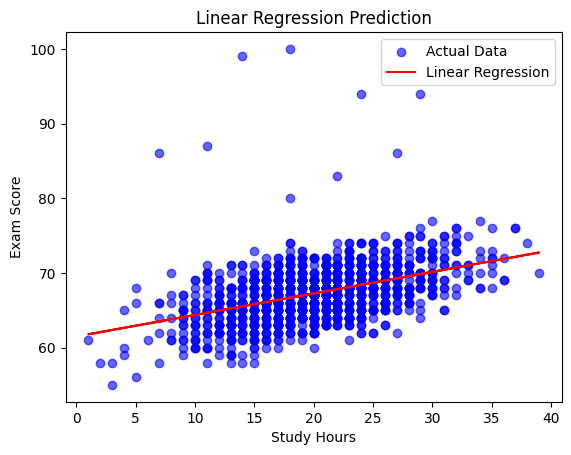

In [32]:
plt.scatter(X_test, y_test, color='blue', label='Actual Data', alpha=0.6) #creating a plot to show the actual data and the prediction so it can be visualized better
plt.plot(X_test, y_pred, color='red', label='Linear Regression')
plt.xlabel("Study Hours")
plt.ylabel("Exam Score")
plt.title("Linear Regression Prediction")
plt.legend()
plt.show()

In [31]:
#evaluating the model performance by using metrics : variance , mean absolute & square error
meanAbs = mean_absolute_error(y_test, y_pred)
meanSq = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(meanSq)
variance = r2_score(y_test, y_pred)

print(f"Mean Absolute Error: {meanAbs:.2f}")
print(f"Mean Squared Error: {meanSq:.2f}")
print(f"Root Mean Squared Error: {rmse:.2f}")
print(f"Variance Score: {variance:.2f}")


Mean Absolute Error: 2.53
Mean Squared Error: 12.35
Root Mean Squared Error: 3.51
Variance Score: 0.21


In [37]:
# bonus:polynomial regression pf 2nd degree
poly = PolynomialFeatures(degree=2)
#training
X_poly = poly.fit_transform(X_train)
#testing
X_poly_test = poly.transform(X_test)

In [38]:
#choosing model then fitting and predicting
poly_model = LinearRegression()
poly_model.fit(X_poly, y_train)
y_poly_pred = poly_model.predict(X_poly_test)

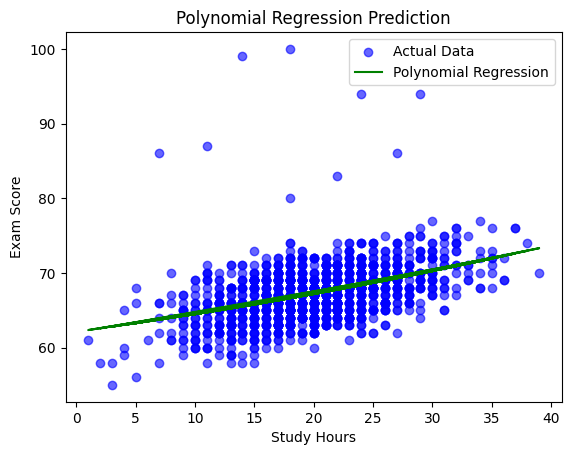

In [39]:
# Transform features for polynomial regression
X_poly_test = poly.transform(X_test)
y_pred_poly = poly_model.predict(X_poly_test)


# Plot
plt.scatter(X_test, y_test, color='blue', label='Actual Data', alpha=0.6)
plt.plot(X_test, y_poly_pred, color='green', label='Polynomial Regression')
plt.xlabel("Study Hours")
plt.ylabel("Exam Score")
plt.title("Polynomial Regression Prediction")
plt.legend()
plt.show()


In [40]:
#evaluating the model performance by using metrics : variance , mean absolute & square error
meanAbs = mean_absolute_error(y_test, y_poly_pred)
meanSq = mean_squared_error(y_test,  y_poly_pred)
rmse = np.sqrt(meanSq)
variance = r2_score(y_test, y_poly_pred)

print(f"Mean Absolute Error: {meanAbs:.2f}")
print(f"Mean Squared Error: {meanSq:.2f}")
print(f"Root Mean Squared Error: {rmse:.2f}")
print(f"Variance Score: {variance:.2f}")

Mean Absolute Error: 2.53
Mean Squared Error: 12.35
Root Mean Squared Error: 3.51
Variance Score: 0.21
